# Learning curves and tree depth — Solution notebook (smoothed)

This notebook provides a **worked solution** for the in-class exercise on how the maximum depth of a decision tree affects the learning curves (train/test error vs. number of training samples).

Compared to the previous version, we now **average over several random subsamples** for each training size. This makes the curves much smoother and easier to interpret.

## Exercise: How does tree depth affect learning curves?

We want to study how the **model complexity** (tree depth) of a decision tree changes the learning behavior.

1. Generate a 2D binary classification dataset (two Gaussian blobs).
2. For five different tree depths, `max_depth = 1, 2, 3, 5, 10`, compute learning curves:
   - Increase the **number of training samples** from small to large.
   - For each training size, train the model and record **training error** and      **test error**.
3. Plot, for each depth, both curves in the same figure.
4. From the curves, discuss:
   - Which depth suffers from **high bias**?
   - Which depth suffers from **high variance / overfitting**?
   - Which depth gives the best **bias–variance trade-off** in this example?


Train size: 490
Test size : 210


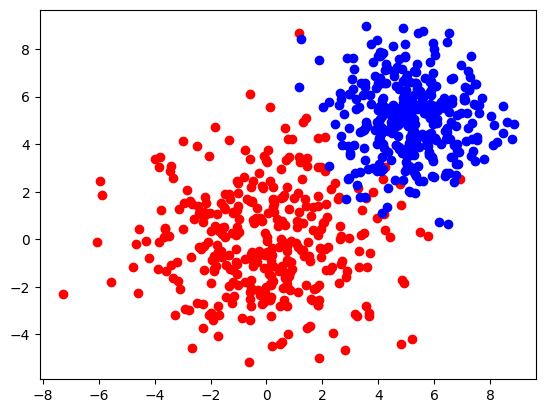

In [13]:
# Imports and synthetic dataset generation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors

from sklearn.model_selection import train_test_split

# For reproducibility
rng = np.random.RandomState(42)

# Generate a simple 2D binary classification problem
n_per_class = 350
X_pos = 2.25 * rng.randn(n_per_class, 2)
X_neg = 5.0 + 1.5 * rng.randn(n_per_class, 2)

X = np.vstack([X_pos, X_neg])
y = np.hstack([np.ones(n_per_class), np.zeros(n_per_class)])  # labels 1 and 0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)

print('Train size:', X_train.shape[0])
print('Test size :', X_test.shape[0])


#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[0:n_per_class,0],X[0:n_per_class,1],color='r')
plt.scatter(X[n_per_class:,0],X[n_per_class:,1],color='b')
plt.show()